# 使用并查集，求句子相似度

In [64]:
# 并查集合并
def union(word1, word2):
    x = find(word1)
    y = find(word2)
    if x != y:
        map[x] = y

In [65]:
# 查找帮主
def find(word):
    while word in map and map[word] != word:
        # 向上找到父亲节点
        word = map[word]
    return word

In [66]:
# 判断两个单词是否相似
def is_similar(words1, words2, pairs):
    # 长度如果不相等
    if len(words1) != len(words2):
        return False
    # 插入到并查集
    for pair in pairs:
        union(pair[0], pair[1])
    # 判断word1, word2中每个单词的帮主是否一致（相同含义）
    for i in range(len(words1)):
        if find(words1[i]) != find(words2[i]):
            return False
    return True

In [67]:
# 记录每个节点的父亲节点
map = {}
words1 = ["great", "acting", "skills"]
words2 = ["fine", "drama", "talent"]
pairs = [["great", "fine"], ["acting","drama"], ["skills","talent"]]
print(is_similar(words1, words2, pairs))

words1 = ["great"]
words2 = ["great"]
pairs = []
print(is_similar(words1, words2, pairs))

True
True


# 使用PyTorch 对随机生成的200个二分类样本进行学习和预测

In [68]:
from sklearn.datasets import make_moons
import torch
import numpy as np
import matplotlib.pyplot as plt

[[ 0.435018    0.30610664]
 [ 1.43945224 -0.09135623]
 [ 0.06755957  0.67312595]
 [ 0.31212183  0.05179172]
 [-0.09762979 -0.0955339 ]
 [ 1.27813538 -0.71572837]
 [ 0.12245535  1.0587108 ]
 [ 0.47114767  0.69480988]
 [-0.04620811  0.12777177]
 [-0.13416591  0.26590921]
 [-0.20733425 -0.12160184]
 [ 0.80424597 -0.11893613]
 [ 0.23817489 -0.22988587]
 [ 0.28640076  0.98905328]
 [ 0.32839983  0.44072682]
 [ 1.32090709 -0.88671682]
 [-1.03704101  0.61791898]
 [ 0.39073766 -0.32451606]
 [ 1.67890755  0.42637495]
 [-0.78725591  0.40904886]
 [ 1.96577789  0.61548428]
 [ 1.33739934 -0.47522962]
 [-0.00499648  1.14205822]
 [-0.87928471  1.26108455]
 [-1.22468754  0.18177208]
 [ 0.59113289  0.84819287]
 [ 1.36536059 -0.07863534]
 [ 0.91342347  0.57793407]
 [-0.84662737  0.49496337]
 [ 1.67868042 -0.26382089]
 [ 1.94760477  0.52176962]
 [ 1.96962082 -0.37169676]
 [ 0.88990353 -0.49863825]
 [ 0.23022009 -0.58860587]
 [-1.14885946  0.51640428]
 [-0.85127032  0.9914816 ]
 [-0.83411534  0.48692421]
 

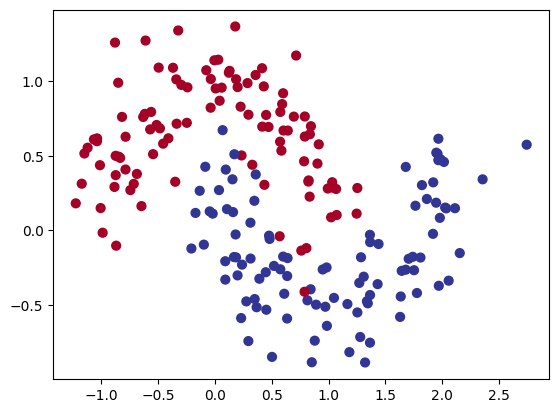

In [69]:

# 使用make_moon内置生成模型，随机产生二分类数据，200个样本
np.random.seed(33)
X, y = make_moons(200,noise=0.2)
print(X) 
print(y) 
cm = plt.cm.get_cmap('RdYlBu')
plt.scatter(X[:,0],X[:,1],s=40,c=y,cmap=cm)
plt.show()

In [70]:
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)
print(X)
print(y)

tensor([[ 0.4350,  0.3061],
        [ 1.4395, -0.0914],
        [ 0.0676,  0.6731],
        [ 0.3121,  0.0518],
        [-0.0976, -0.0955],
        [ 1.2781, -0.7157],
        [ 0.1225,  1.0587],
        [ 0.4711,  0.6948],
        [-0.0462,  0.1278],
        [-0.1342,  0.2659],
        [-0.2073, -0.1216],
        [ 0.8042, -0.1189],
        [ 0.2382, -0.2299],
        [ 0.2864,  0.9891],
        [ 0.3284,  0.4407],
        [ 1.3209, -0.8867],
        [-1.0370,  0.6179],
        [ 0.3907, -0.3245],
        [ 1.6789,  0.4264],
        [-0.7873,  0.4090],
        [ 1.9658,  0.6155],
        [ 1.3374, -0.4752],
        [-0.0050,  1.1421],
        [-0.8793,  1.2611],
        [-1.2247,  0.1818],
        [ 0.5911,  0.8482],
        [ 1.3654, -0.0786],
        [ 0.9134,  0.5779],
        [-0.8466,  0.4950],
        [ 1.6787, -0.2638],
        [ 1.9476,  0.5218],
        [ 1.9696, -0.3717],
        [ 0.8899, -0.4986],
        [ 0.2302, -0.5886],
        [-1.1489,  0.5164],
        [-0.8513,  0

In [71]:
import torch.nn as nn
import torch.nn.functional as F

In [72]:
# 定义的网络模型继承了nn.Module
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        # 定义第1个FC层，使用Linear transformation
        self.fc1 = nn.Linear(2,100)
        # 定义第2个FC层，使用Linear transformation
        self.fc2 = nn.Linear(100,2)
        
    def forward(self,x):
        # 第一层的输出
        x = self.fc1(x)
        # 激活层
        x = F.tanh(x)
        # 输出层
        x = self.fc2(x)
        return x
        
    # 得到预测分类结果 0或者1
    def predict(self,x):
        # 对于输出结果进行softmax计算
        #pred = F.softmax(self.forward(x))
        pred = self.forward(x)
        ans = []
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

In [73]:
# 初始化模型
model = Net()
# 定义评估标准（损失函数）
criterion = nn.CrossEntropyLoss()
# 定义优化器
#print('parameters=\n', model.parameters())
print(f'\nParameters: {np.sum([param.numel() for param in model.parameters()])}')
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


Parameters: 502


In [74]:
# 迭代次数epochs
epochs = 1000
# 存储每次迭代的loss
losses = []
for i in range(epochs):
    # 对输入的X进行预测
    y_pred = model.forward(X)
    # 得到损失loss
    loss = criterion(y_pred,y)
    losses.append(loss.item())
    # 清空之前的梯度
    optimizer.zero_grad()
    # 计算梯度
    loss.backward()
    # 调整权重
    optimizer.step()

In [75]:
from sklearn.metrics import accuracy_score
print(model.predict(X))
print(accuracy_score(model.predict(X),y))    

tensor([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 1, 0])
0.985


In [76]:
# 进行预测，并转换为numpy类型
def predict(x):
    x = torch.from_numpy(x).type(torch.FloatTensor)
    ans = model.predict(x)
    return ans.numpy()

In [77]:
# 绘制二分类决策面
def plot_decision_boundary(pred_func,X,y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # 计算决策面
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # np.c_按行连接两个矩阵，就是把两矩阵左右相加
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # 绘制分类决策面
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    # 绘制样本点
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)
    plt.show()

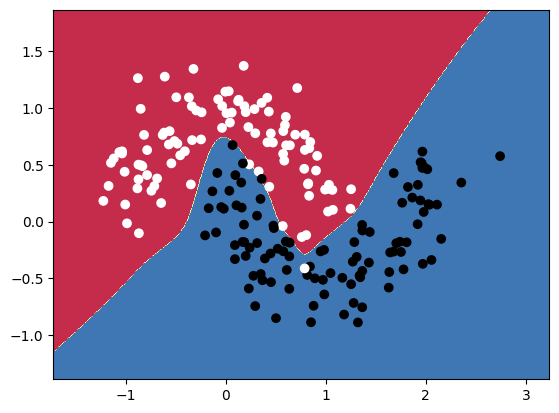

In [78]:
plot_decision_boundary(lambda x : predict(x) ,X.numpy(), y.numpy())

# 使用numpy实现一个神经网络

In [79]:
import numpy as np

In [80]:
# n为样本大小，d_in为输入维度,d_out为输出维度,h为隐藏层维度
n, d_in, h, d_out = 64, 1000, 100, 10

In [81]:
# 随机生成数据
x = np.random.randn(n, d_in)
y = np.random.randn(n, d_out)

In [82]:
# 随机初始化权重
# 输入层到隐藏层的权重（1000，100）
w1 = np.random.randn(d_in, h)
# 隐藏层到输出层的权重（100，10）
w2 = np.random.randn(h, d_out)
# 设置学习率
learning_rate = 1e-6

In [83]:
# 500次迭代
for t in range(500):
    # 前向传播，计算预测值y
    temp = x.dot(w1)
    temp_relu = np.maximum(temp, 0)
    y_pred = temp_relu.dot(w2)

    # 计算损失函数
    loss = np.square(y_pred - y).sum() / n
    print(t, loss)

    
    # 反向传播，基于loss 计算w1和w2的梯度
    grad_y_pred = 2.0 * (y_pred - y)

    # 因为temp_relu 点乘 w2 = y_pred，所以 w2梯度 = temp_relu.T.dot(grad_y_pred)
    grad_w2 = temp_relu.T.dot(grad_y_pred)
    #print(grad_w2)
    # 因为 temp_relu 点乘 w2 = y_pred
    grad_temp_relu = grad_y_pred.dot(w2.T)
    grad_temp = grad_temp_relu.copy()
    grad_temp[temp<0] = 0
    grad_w1 = x.T.dot(grad_temp)

    # 更新权重
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 419610.98679877043
1 342009.70868325327
2 318314.2062900234
3 303463.5055593314
4 276734.7350865095
5 230136.29885666672
6 174202.43502145557
7 120564.89554762124
8 79210.4043792685
9 50711.77841299646
10 32786.49503688841
11 21805.858776443318
12 15151.719628983745
13 11033.402779291067
14 8404.211223701821
15 6647.611845922867
16 5418.185119791133
17 4516.40982202677
18 3829.026282030316
19 3286.7338919070644
20 2847.4181234284733
21 2484.3050422781366
22 2179.718281643618
23 1921.1973464679345
24 1700.1985564148035
25 1509.5469211770142
26 1344.20613521468
27 1200.3327775725086
28 1074.8828703571178
29 964.7753394972361
30 867.8663987055802
31 782.186330870096
32 706.2226756949715
33 638.7246896679458
34 578.5801065346477
35 524.8596799136214
36 476.8211693274886
37 433.74181923829155
38 395.0783781946169
39 360.3324237706306
40 328.99093905015326
41 300.69648707799104
42 275.1203213375216
43 251.96056605574475
44 230.97215072966262
45 211.92517748525324
46 194.6114863926368
47 17

In [84]:
print(w1, w2)
#print(w1) 
#print(w2) 

[[-3.40486767 -1.94722626  0.28677569 ...  0.87031674 -0.40039876
   0.16050539]
 [-0.90803335 -0.27336889 -0.46080606 ... -0.04079916 -0.23795967
  -0.56257196]
 [-0.6168214  -0.3305322  -1.46634776 ... -0.98455721 -0.1679438
  -0.89948204]
 ...
 [-1.76358105 -0.02617224 -1.26433465 ...  0.55979594 -1.59364886
  -1.11604742]
 [ 0.61746462 -0.67505962  0.198123   ...  0.29028924 -0.73310008
  -1.77025501]
 [ 0.35997642 -0.06881119  1.12707248 ... -1.36162312 -0.30562631
  -0.58163086]] [[-6.97606646e-01 -6.12985525e-01 -5.65051270e-01 -7.67051859e-03
   2.90671052e-02 -2.14047285e-01  1.86249344e+00  9.36196061e-01
   6.94446175e-01 -3.02473322e-01]
 [-8.71094877e-01 -5.19322086e-01  1.22386790e+00 -2.24742147e-01
  -9.66444159e-02 -7.74203865e-01 -3.36439109e-01  5.54558477e-01
   1.85485170e+00  1.10357144e+00]
 [ 9.71113191e-02 -1.11343089e+00  2.00968616e+00 -1.02381768e+00
   1.07961000e+00  1.96228622e-01 -7.35054024e-01 -1.37369458e+00
   8.17239252e-01 -2.24782326e-01]
 [ 1.419

# 使用numpy实现Boston房价预测

In [85]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.utils import shuffle, resample

In [86]:
# 数据加载
data = load_boston()
X_ = data['data']
y = data['target']
#print(X_)
#print(len(X_)) # 506
y = y.reshape(y.shape[0],1)

In [87]:
# 数据规范化
X_ = (X_ - np.mean(X_, axis=0)) / np.std(X_, axis=0)
#print(X_)

In [88]:
n_features = X_.shape[1]
n_hidden = 10
w1 = np.random.randn(n_features, n_hidden)
b1 = np.zeros(n_hidden)
w2 = np.random.randn(n_hidden, 1)
b2 = np.zeros(1)


In [89]:
# relu函数
def Relu(x):
    result = np.where(x<0,0,x)
    return result

In [90]:
# 设置学习率
learning_rate = 1e-6

In [91]:
def MSE_loss(y, y_hat):
    return np.mean(np.square(y_hat - y))

def Linear(X, W1, b1):
    result = X.dot(W1) + b1
    return result

In [92]:
# 500次迭代
for t in range(5000):
    # 前向传播，计算预测值y
    l1 = Linear(X_, w1, b1)
    s1 = Relu(l1)
    #s1 = np.maximum(l1, 0)
    #print('s1=', s1.shape) #(506, 10)
    #print('w2=', w2.shape) #(506, 10)
    #print('s1.T=', s1.T.shape) #(10, 506)
    y_pred = Linear(s1, w2, b2)
    #y_pred = l2 = s1.dot(w2) + b2
    #print('y_pred=', y_pred.shape) #(506, 1)
    #print('y=', y.shape) #(506, 1)


    #temp = X.dot(w1)
    #temp_relu = np.maximum(temp, 0)
    #y_pred = temp_relu.dot(w2)

    # 计算损失函数
    loss = MSE_loss(y, y_pred)
    #loss = np.square(y_pred - y).sum()
    print(t, loss)

    # 反向传播，基于loss 计算w1和w2的梯度
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = s1.T.dot(grad_y_pred) #(10, 506) * (506, 506)
    #print('grad_w2=', grad_w2.shape) #(10, 506)
    #print('grad_y_pred=', grad_y_pred.shape) #(506, 506)
    #print('w2.T=', w2.T.shape) #(1, 10)
    grad_temp_relu = grad_y_pred.dot(w2.T) #(506, 506),  (1, 10)
    grad_temp = grad_temp_relu.copy()
    grad_temp_relu[l1<0] = 0
    grad_w1 = X_.T.dot(grad_temp)

    # 更新权重
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 555.5662717799254
1 540.4467695272169
2 525.8747002110981
3 511.7836028343306
4 498.1145476868504
5 484.8135963582339
6 471.8521612077363
7 459.21575019953434
8 446.87817461912306
9 434.7951498995654
10 422.9743888739457
11 411.4005768749197
12 400.04460197860504
13 388.91298864520894
14 377.96870492308415
15 367.1909464320183
16 356.5752423437757
17 346.08461624784366
18 335.7590060406199
19 325.61047550578695
20 315.61286722694325
21 305.7988930951537
22 296.1687207457824
23 286.7480801606264
24 277.5064918941812
25 268.4734985833235
26 259.6656955694959
27 251.10345245963995
28 242.80389151976024
29 234.7702929362234
30 226.9935441243541
31 219.4622910536262
32 212.16758004915962
33 205.12731708065522
34 198.34753217859338
35 191.8489336297419
36 185.6185134354675
37 179.63668290172257
38 173.90738619769084
39 168.4241907775061
40 163.19759390071715
41 158.21540994485719
42 153.47078696016294
43 148.95745218169927
44 144.66535255526767
45 140.5870764576592
46 136.71591454096492
47

In [93]:
print('w1={} \n w2={}'.format(w1, w2))
#print(w1) 
#print(w2) 

w1=[[-4.34877132 -0.13257417 -1.17831771 -1.67752703 -4.27341934 -0.46201734
  -1.37951385 -4.99835772 -2.8389599   0.32896796]
 [ 0.60131032  1.22188879 -0.08947643 -1.44825048 -1.0708282  -1.40493744
   0.58709213 -0.7428877  -0.35738403  0.63122455]
 [-0.38792567 -1.42190208  0.03658283  0.17646191  0.118161    1.37229626
   0.56618373  0.12533707 -1.16861759  1.0816404 ]
 [ 0.41393413  1.46962247 -0.7050622  -0.95231161 -0.64559009 -1.31651616
  -0.33878267  1.36712548  0.04486263  0.21930129]
 [ 0.87565168 -0.44452208 -0.06615683  0.20603809 -1.58791259 -0.03044495
   0.24168243 -3.5271899  -0.72421245 -0.27537334]
 [ 0.3077662   0.29171174 -2.62416709 -0.34827163 -0.57059779  0.94318656
  -1.30786103  0.93453228  0.8895233   0.66123714]
 [-0.35181057 -0.04644799  0.58105241  1.57373976  0.84181503 -1.22467058
   0.22334537  0.21782937 -0.25322217 -0.75299196]
 [-1.60514398  1.3633442   0.03321114 -0.26629415 -0.40571247 -0.12167774
   0.77014524 -0.39303075  0.49973696 -2.0570495